# Unsupervised Machine Learning-Cluster Analysis SuperStore

In the previous exercise we tried to predict profit per unit for the technology category by running a linear regression and using sales per unit as a predictor variable. It proved to be a poor choice as there wasn't much of the variance explained by the model. <br><br>This time will try to approach not just using the data from the technology category, but all the categories plus other variables (quantity and discount) to see if we can uncover segments that share common traits, like some source of segmentation using a cluster analysis approach called K-Means.<br><br> Let's us remeber that when we were doing data visualization before, we grouped the data based on the type of purchase (big, medium and low) making partitions based on the mean and the median values of the variable sales.  

#### Install and import all necessary libraries in your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path into a string 
path= r'C:\Users\Carolina\Documents\CareerFoundry\Data Immersion\Achievement 6- Advanced Analytics & Dashboard Design'

In [4]:
# Import dataset into Jupyter as df_ss  
df_ss = pd.read_csv(os.path.join(path, '02-SS Data','Prepared Data','Superstore4.csv'))

#### Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

In [5]:
df_ss.shape

(9993, 21)

In [6]:
df_ss.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Discount',
       'Order Date', 'Order ID', 'Manufacturer', 'Product Name', 'Profit',
       'Quantity', 'Region', 'Sales', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'type purchase', 'sales_per_order',
       'profit_per_order'],
      dtype='object')

In [7]:
# create a subset that only contains the numerical values
df_ss2=df_ss.loc[:, df_ss.columns.isin(['Profit','Discount', 'Quantity', 'Sales', 'sales_per_order','profit_per_order'])]

In [8]:
df_ss2.shape

(9993, 6)

In [9]:
df_ss2.head()

,Discount,Profit,Quantity,Sales,sales_per_order,profit_per_order
0,0.00,41.9136,2,261.9600,130.9800,20.9568
1,0.00,219.5820,3,731.9400,243.9800,73.1940
2,0.00,6.8714,2,14.6200,7.3100,3.4357
3,0.45,-383.0310,5,957.5775,191.5155,-76.6062
4,0.20,2.5164,2,22.3680,11.1840,1.2582


#### Use the elbow technique as shown in the Jupyter notebook for this Exercise. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_ss2).score(df_ss2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4665619931.0718775,
 -2627251096.604447,
 -1558285004.5161912,
 -1100024678.0511966,
 -896556571.7951922,
 -733420851.6511772,
 -619041890.327817,
 -531988522.13731486,
 -463520696.82877]

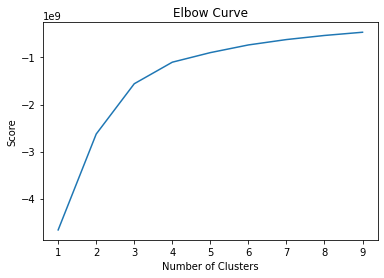

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

According to the results of the elbow technique, the behavior of the upward curve shifts at 4 clusters. Beyond that, the curve only grows marginally. Therefore, this allow us to define the number of clusters as 4. 

#### Run the k-means algorithm.

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_ss2)

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

#### Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [15]:
df_ss2['clusters'] = kmeans.fit_predict(df_ss2)

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-15-667072c790e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss2['clusters'] = kmeans.fit_predict(df_ss2)


In [20]:
df_ss2.head()

,Discount,Profit,Quantity,Sales,sales_per_order,profit_per_order,clusters
0,0.00,41.9136,2,261.9600,130.9800,20.9568,0
1,0.00,219.5820,3,731.9400,243.9800,73.1940,2
2,0.00,6.8714,2,14.6200,7.3100,3.4357,0
3,0.45,-383.0310,5,957.5775,191.5155,-76.6062,2
4,0.20,2.5164,2,22.3680,11.1840,1.2582,0


In [21]:
df_ss2['clusters'].value_counts()

0    8892
2     979
3     112
1      10
Name: clusters, dtype: int64

#### Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

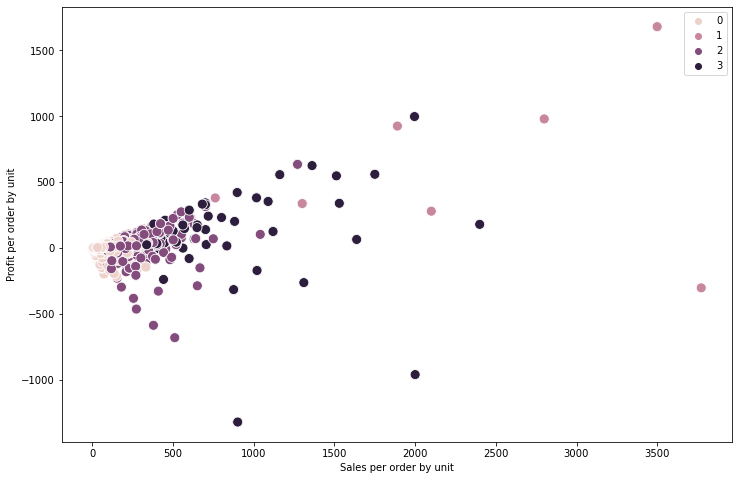

In [22]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ss2['sales_per_order'], y=df_ss2['profit_per_order'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales per order by unit') # Label x-axis.
plt.ylabel('Profit per order by unit') # Label y-axis.
plt.show()

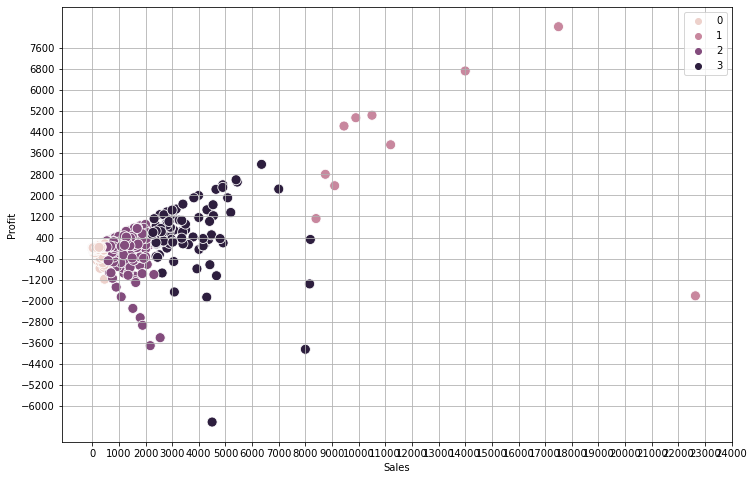

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ss2['Sales'], y=df_ss2['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.xticks(np.arange(0, 25000, 1000))
plt.yticks(np.arange(-6000, 8000, 800))
plt.show()

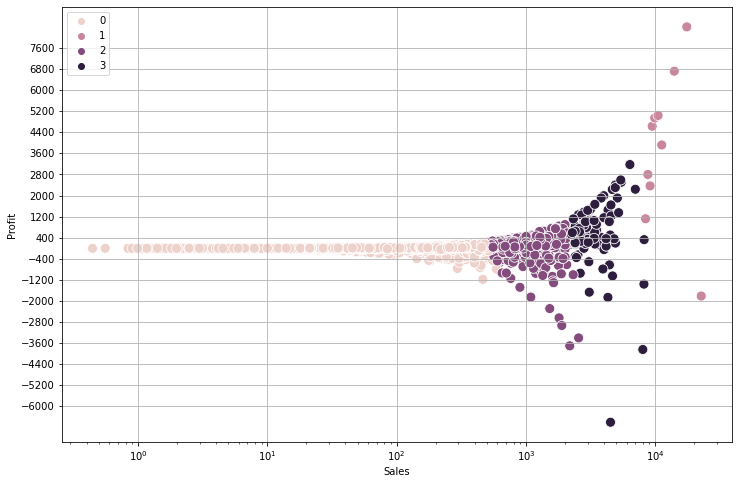

In [24]:
# Let's try to zoom those values to see where do they concentrate 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ss2['Sales'], y=df_ss2['Profit'], hue=kmeans.labels_, s=100) 
ax.grid(True) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.xticks(np.arange(0, 25000, 1000))
plt.yticks(np.arange(-6000, 8000, 800))
ax.set_xscale('log')
plt.show()

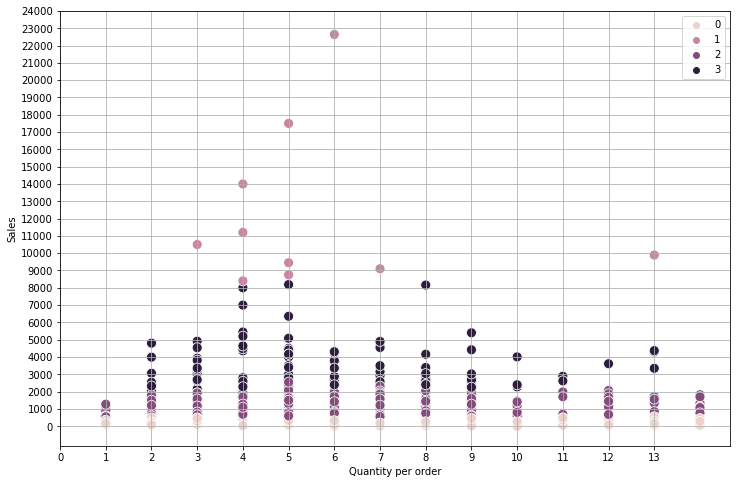

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ss2['Quantity'], y=df_ss2['Sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This removes the grid from the background.
plt.xlabel('Quantity per order') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.xticks(np.arange(0, 14, 1))
plt.yticks(np.arange(0, 25000, 1000))
plt.show()

#### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings

In [26]:
#Create a new column that includes the color of the cluster
df_ss2.loc[df_ss2['clusters'] == 3, 'cluster'] = 'black'
df_ss2.loc[df_ss2['clusters'] == 2, 'cluster'] = 'dark purple'
df_ss2.loc[df_ss2['clusters'] == 1, 'cluster'] = 'pink'
df_ss2.loc[df_ss2['clusters'] == 0, 'cluster'] = 'pale pink'

C:\Users\Carolina\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Carolina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Carolina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [27]:
df_ss2.groupby('cluster').agg({'Profit':['mean', 'median'], 
                         'Sales':['mean', 'median'], 
                         'Quantity':['mean', 'median'],
                          'Discount':['mean', 'median'],
                              'sales_per_order':['mean', 'median'],
                              'profit_per_order':['mean', 'median']})

Profit                     Sales             Quantity  \
                    mean      median          mean     median      mean   
cluster                                                                   
black         577.233805   631.09265   3416.914630   2956.625  6.232143   
dark purple    88.434223   111.10350    959.210850    843.900  5.016343   
pale pink      10.914320     7.42980     96.010656     41.546  3.621907   
pink         3813.166090  4275.23215  12143.087400  10196.355  5.600000   

                    Discount        sales_per_order            \
            median      mean median            mean    median   
cluster                                                         
black            6  0.120268    0.1      675.643879   539.928   
dark purple      5  0.144566    0.2      230.133528   199.000   
pale pink        3  0.157972    0.2       31.808667    12.440   
pink             5  0.110000    0.0     2487.398600  2449.993   

            profit_per_order             
                        mean     median  
cluster                                  
black             124.989159   94.08660  
dark purple        25.897660   25.04900  
pale pink           3.418538    2.37600  
pink              820.271490  743.04595

In terms of profit, the best stats are in the pink cluster for an average of $\$$3813 and only 10 observations. The sales seems to be the highest compare to the other clusters. Their is no significant diference in quantity when compared to the other clusters, but in the graph most of the points are concentrated before 7 items per order. Other important characteristic of this group is that it it has the lowest discounts. 

Most of the sales are concentrated in the pale pink cluster where sales are inferior to $\$$1000 and there is the least variability of profit ranging from -$\$$1200 to less than $\$$400 (this is evidenced in the scaterred plot). Important is to see that this cluster has the least average profitability and sales, as well, as the lowest number of items per order, which makes sense since small purchases comprise only just a few items-3 items in average. 

The black category holds sales that concentrate around $\$$3000, a lower profit compared to the pink cluster but yet the highest number of items of orders. The dark purple clusters sits in the middle for purchases that are $\$$960 on average and having the same degree of discount as the least profitable cluster.  

### Propose what these results could be useful for in future steps of an analytics pipeline.

For next steps, as we already have a new segmentation, something useful to do is to plug the column of the cluster classification ("cluster") into the original dataframe(df_ss2) and do again exploratory analysis, but now incorporating categorical variables such a location, category and type of shipment to further understand the peculiarities within each of these clusters and make a final recommendation on how to improve profit. 

In [28]:
df_ss['cluster']= df_ss2['cluster']

In [29]:
df_ss.shape

(9993, 22)

In [30]:
df_ss.head()

,Category,City,Country,Customer Name,Discount,Order Date,Order ID,Manufacturer,Product Name,Profit,...,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,type purchase,sales_per_order,profit_per_order,cluster
0,Furniture,Henderson,United States,Claire Gute,0.00,2017-11-08,CA-2017-152156,Bush,Bush Somerset Collection Bookcase,41.9136,...,261.9600,Consumer,2017-11-11,Second Class,Kentucky,Bookcases,Big purchase,130.9800,20.9568,pale pink
1,Furniture,Henderson,United States,Claire Gute,0.00,2017-11-08,CA-2017-152156,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,...,731.9400,Consumer,2017-11-11,Second Class,Kentucky,Chairs,Big purchase,243.9800,73.1940,dark purple
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,2017-06-12,CA-2017-138688,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,...,14.6200,Corporate,2017-06-16,Second Class,California,Labels,Low purchase,7.3100,3.4357,pale pink
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,2016-10-11,US-2016-108966,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,...,957.5775,Consumer,2016-10-18,Standard Class,Florida,Tables,Big purchase,191.5155,-76.6062,dark purple
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,2016-10-11,US-2016-108966,Eldon,Eldon Fold 'N Roll Cart System,2.5164,...,22.3680,Consumer,2016-10-18,Standard Class,Florida,Storage,Low purchase,11.1840,1.2582,pale pink


In [32]:
#Check that the two columns are the same 
df_ss['cluster'] .equals(df_ss2['cluster'] )

True

In [33]:
#Export data 
df_ss.to_csv((os.path.join(path, '02-SS Data','Prepared Data','Superstore5.csv')), index=False)